# Pre-processing and analysis of single-cell RNA-seq with kallisto|bustools 

This notebook is based on methods described in the following publications:
* Bray, N. L., Pimentel, H., Melsted, P. & Pachter, L. Near-optimal probabilistic RNA-seq quantification. Nat. Biotechnol. 34, 525–527 (2016).
* Wolf, F. A., Angerer, P. & Theis, F. J. SCANPY: large-scale single-cell gene expression data analysis. Genome Biol. 19, 15 (2018).
* Melsted, P., Ntranos, V. & Pachter, L. The Barcode, UMI, Set format and BUStools. Bioinformatics (2019). doi:10.1093/bioinformatics/btz279
* Melsted, P., Booeshaghi, A.S. et al. Modular and efficient pre-processing of single-cell RNA-seq. BioRxiv (2019). doi:10.1101/673285


In [2]:
!date

Wed Dec  4 22:25:45 UTC 2019


## Install `kb` (includes kallisto and bustools)

Install `kb` for running the kallisto|bustools workflow

In [3]:
!time pip install kb-python==0.24.1


     |████████████████████████████████| 35.4MB 1.2MB/s 
     |████████████████████████████████| 51kB 8.3MB/s 
     |████████████████████████████████| 51kB 8.2MB/s 
     |████████████████████████████████| 51kB 9.3MB/s 
  Created wheel for loompy: filename=loompy-3.0.6-cp36-none-any.whl size=47896 sha256=6a91d9851c7e3ee9eb19edb1509df2c32ef62d79132d6bc927e430468fabb0ce
  Stored in directory: /root/.cache/pip/wheels/f9/a4/90/5a98ad83419732b0fba533b81a2a52ba3dbe230a936ca4cdc9
  Created wheel for numpy-groupies: filename=numpy_groupies-0+unknown-cp36-none-any.whl size=27879 sha256=35af6033e8dbfe1eb8adb59755657a3206dc297d894202678db73e30c5cb5f75
  Stored in directory: /root/.cache/pip/wheels/6c/fb/3d/5c43eb691bd92a3ddd0ebeb6e7e78ceaf3ae1cb8d54b89a7fb
Successfully built loompy numpy-groupies

real	0m10.158s
user	0m5.161s
sys	0m1.060s


### Run kb

In [5]:
!time kb ref -d human -i idx.idx -g t2g.txt -f1 ref.fa

[2019-12-04 22:28:48,585]    INFO Downloading files for human from https://caltech.box.com/shared/static/v1nm7lpnqz5syh8dyzdk2zs8bglncfib.gz to tmp/v1nm7lpnqz5syh8dyzdk2zs8bglncfib.gz
[2019-12-04 22:30:35,671]    INFO Extracting files from tmp/v1nm7lpnqz5syh8dyzdk2zs8bglncfib.gz

real	2m18.485s
user	0m33.300s
sys	0m10.222s


In [7]:
!wget ftp://ftp.ebi.ac.uk/pub/databases/microarray/data/experiment/MTAB/E-MTAB-6701/FCA7474064_S1_L001_R1_001.fastq.gz
!wget ftp://ftp.ebi.ac.uk/pub/databases/microarray/data/experiment/MTAB/E-MTAB-6701/FCA7474064_S1_L001_R2_001.fastq.gz


--2019-12-05 00:19:02--  ftp://ftp.ebi.ac.uk/pub/databases/microarray/data/experiment/MTAB/E-MTAB-6701/FCA7474064_S1_L001_R1_001.fastq.gz
           => ‘FCA7474064_S1_L001_R1_001.fastq.gz’
Resolving ftp.ebi.ac.uk (ftp.ebi.ac.uk)... 193.62.197.74
Connecting to ftp.ebi.ac.uk (ftp.ebi.ac.uk)|193.62.197.74|:21... connected.
Logging in as anonymous ... Logged in!
==> SYST ... done.    ==> PWD ... done.
==> TYPE I ... done.  ==> CWD (1) /pub/databases/microarray/data/experiment/MTAB/E-MTAB-6701 ... done.
==> SIZE FCA7474064_S1_L001_R1_001.fastq.gz ... 8437805818
==> PASV ... done.    ==> RETR FCA7474064_S1_L001_R1_001.fastq.gz ... done.
Length: 8437805818 (7.9G) (unauthoritative)

FCA7474064_S1_L001_ 100%[===================>]   7.86G  14.1MB/s    in 7m 12s  

2019-12-05 00:26:16 (18.6 MB/s) - ‘FCA7474064_S1_L001_R1_001.fastq.gz’ saved [8437805818]

--2019-12-05 00:26:26--  ftp://ftp.ebi.ac.uk/pub/databases/microarray/data/experiment/MTAB/E-MTAB-6701/FCA7474064_S1_L001_R2_001.fastq.gz
      

In [13]:
!time kb count -i idx.idx -g t2g.txt -x 10xv2 --h5ad \
      FCA7474064_S1_L001_R1_001.fastq.gz \
      FCA7474064_S1_L001_R2_001.fastq.gz \
      -o FCA7474064


[2019-12-05 01:08:44,878]    INFO Generating BUS file from
[2019-12-05 01:08:44,878]    INFO         FCA7474064_S1_L001_R1_001.fastq.gz
[2019-12-05 01:08:44,878]    INFO         FCA7474064_S1_L001_R2_001.fastq.gz
[2019-12-05 02:06:08,779]    INFO Sorting BUS file FCA7474064/output.bus to tmp/output.s.bus
[2019-12-05 02:09:02,458]    INFO Whitelist not provided
[2019-12-05 02:09:02,458]    INFO Copying pre-packaged 10XV2 whitelist to FCA7474064
[2019-12-05 02:09:02,576]    INFO Inspecting BUS file tmp/output.s.bus
[2019-12-05 02:09:45,246]    INFO Correcting BUS records in tmp/output.s.bus to tmp/output.s.c.bus with whitelist FCA7474064/10xv2_whitelist.txt
[2019-12-05 02:10:31,939]    INFO Sorting BUS file tmp/output.s.c.bus to FCA7474064/output.unfiltered.bus
[2019-12-05 02:12:09,570]    INFO Generating count matrix FCA7474064/counts_unfiltered/cells_x_genes from BUS file FCA7474064/output.unfiltered.bus
[2019-12-05 02:12:42,940]    INFO Converting matrix FCA7474064/counts_unfiltered/c

## Perform basic analysis with ScanPy 

*   Based on the Jupyter notebook from [kallistobus.tools/getting_started](https://www.kallistobus.tools/getting_started) 

### Install python packages

In [8]:
!pip install scanpy[louvain] 
!pip install MulticoreTSNE

     |████████████████████████████████| 1.9MB 3.4MB/s 
     |████████████████████████████████| 3.6MB 51.9MB/s 
     |████████████████████████████████| 13.0MB 44.7MB/s 
     |████████████████████████████████| 92kB 14.7MB/s 
     |████████████████████████████████| 378kB 63.2MB/s 
  Created wheel for louvain: filename=louvain-0.6.1-cp36-cp36m-linux_x86_64.whl size=1025315 sha256=7b0a26fa60388ba10282f9e80eec7aedf440a14ddbb43ec4cfaa034752aea745
  Stored in directory: /root/.cache/pip/wheels/f2/c3/d4/f7abaf064186d6214ef952bbb72fd6c5136d4b17dbeaeff481
  Created wheel for python-igraph: filename=python_igraph-0.7.1.post6-cp36-cp36m-linux_x86_64.whl size=2216843 sha256=ae507d678cde6010b7da70928a8b2b79aefd659a406fa5cd65d959b14784ffa3
  Stored in directory: /root/.cache/pip/wheels/41/d6/02/34eebae97e25f5b87d60f4c0687e00523e3f244fa41bc3f4a7
Successfully built louvain python-igraph
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.

  Created wheel for MulticoreTSNE: filename=MulticoreTSNE-0.1-cp36-cp36m-linux_x86_64.whl size=68507 sha256=f10dd5ce1b11a4a7e9296672ad9d743616602337466bb72c6c940abe2b317ab3
  Stored in directory: /root/.cache/pip/wheels/27/59/53/3b52ee63add3692254c30d687fa4dff4d128d0557861fb028e
Successfully built MulticoreTSNE


### Import Packages

In [0]:
import scanpy as sc
from scipy import sparse, io
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib
import numpy as np

matplotlib.rcParams.update({'font.size': 12})
%config InlineBackend.figure_format = 'retina'

### Import result

In [0]:
folder = "FCA7474064/counts_unfiltered/"

The annotated dataframe has rows (obs) which are cell barcodes, columns (var) which are genes. The actual matrix `adata.X` is a sparse matrix.

In [0]:
adata = sc.read(folder + "adata.h5ad")

In [18]:
adata

AnnData object with n_obs × n_vars = 537801 × 60623 

### Make the knee plot

In [0]:
knee = np.sort((np.array(adata.X.sum(axis=1))).flatten())[::-1]

/usr/local/lib/python3.6/dist-packages/IPython/core/pylabtools.py:125: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


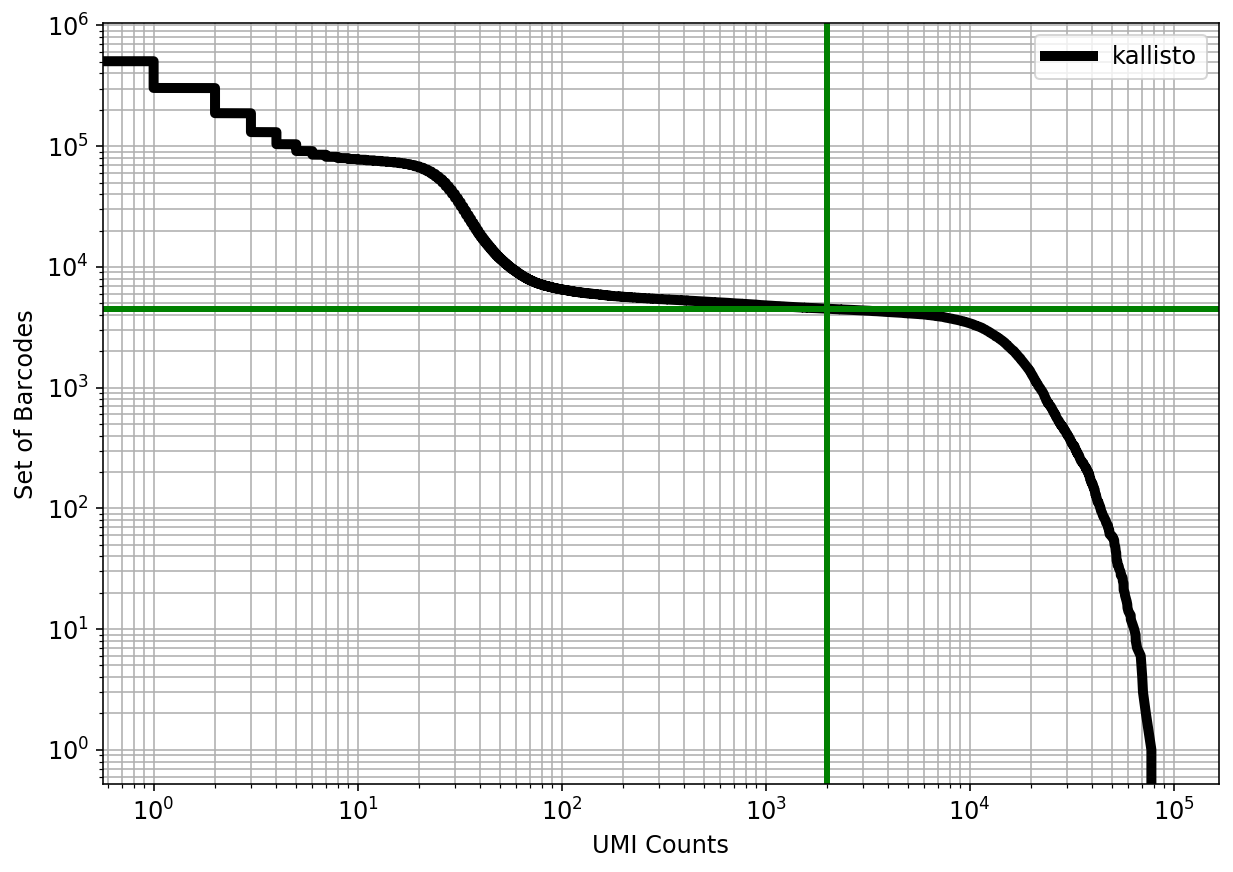

In [21]:
fig, ax = plt.subplots(figsize=(10, 7))

expected_num_cells=4500

ax.loglog(knee, range(len(knee)), label="kallisto", linewidth=5, color="k")
ax.axvline(x=knee[expected_num_cells], linewidth=3, color="g")
ax.axhline(y=expected_num_cells, linewidth=3, color="g")

ax.set_xlabel("UMI Counts")
ax.set_ylabel("Set of Barcodes")

plt.grid(True, which="both")
ax.legend()
plt.show()

### Filter cells

In [0]:
sc.pp.filter_cells(adata, min_genes=0)
sc.pp.filter_cells(adata, min_counts=knee[expected_num_cells])
sc.pp.filter_genes(adata, min_cells=0)

In [23]:
adata

AnnData object with n_obs × n_vars = 4501 × 60623 
    obs: 'n_genes', 'n_counts'
    var: 'n_cells'

### Distribution of genes

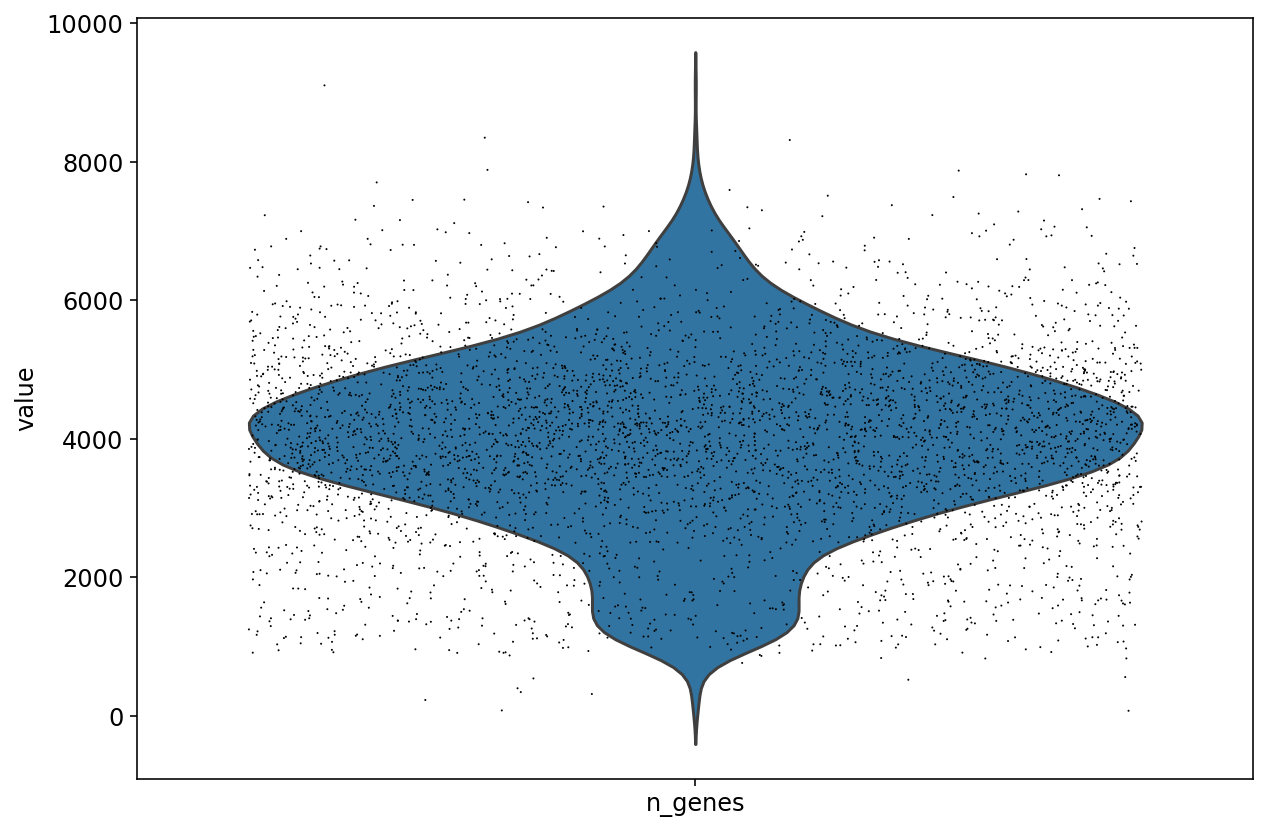

In [24]:
fig, ax = plt.subplots(figsize=(10, 7))
sc.pl.violin(adata, 'n_genes', jitter=0.4, ax=ax)

### Distribution of counts

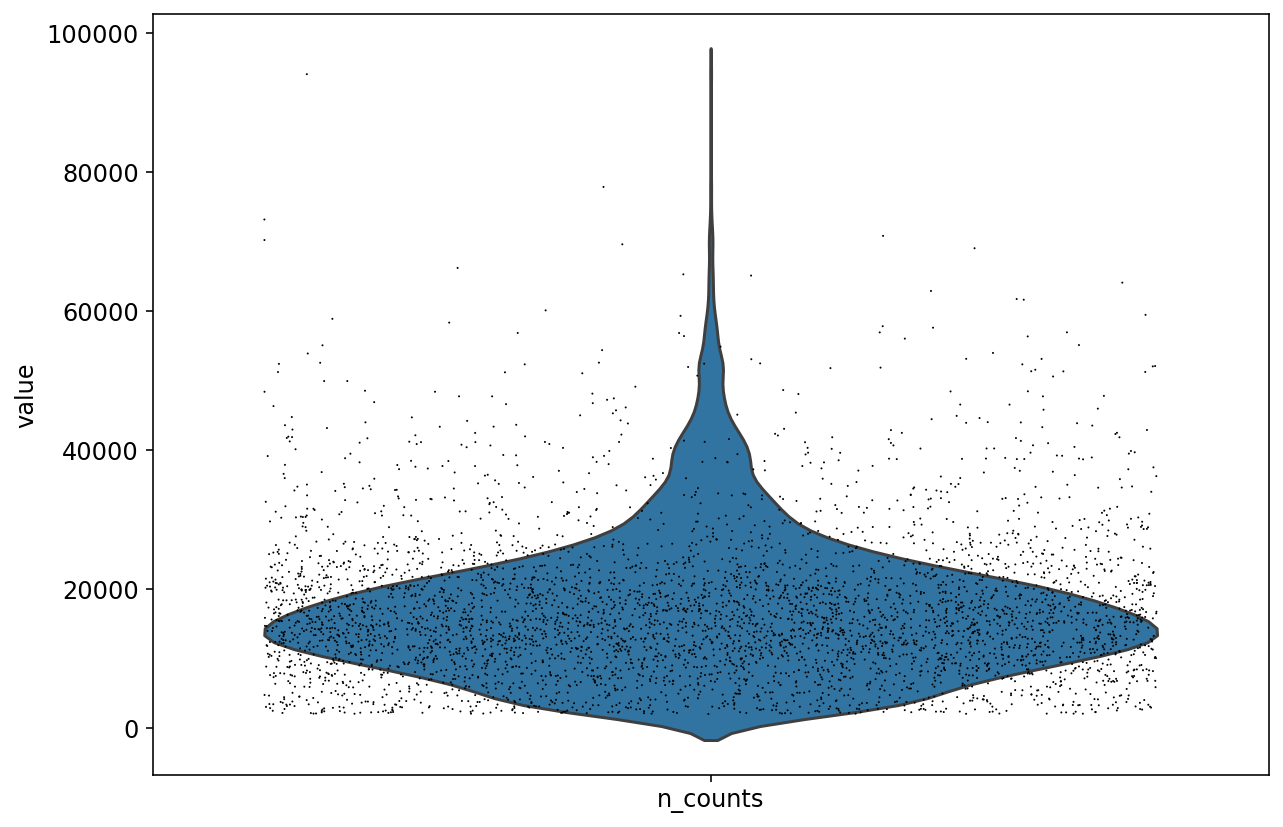

In [25]:
fig, ax = plt.subplots(figsize=(10, 7))
sc.pl.violin(adata, 'n_counts', jitter=0.4, ax=ax)

Normalize the counts in the matrix

In [0]:
sc.pp.normalize_per_cell(adata, counts_per_cell_after=1e4)

apply $log(1+count)$ to all counts in your matrix

In [0]:
adata.raw = sc.pp.log1p(adata, copy=True)

In [0]:
sc.pp.log1p(adata)

Filter adata for highly variable genes, and make `fadata` which only contains highly variable genes for further analysis.

### Highly variable genes

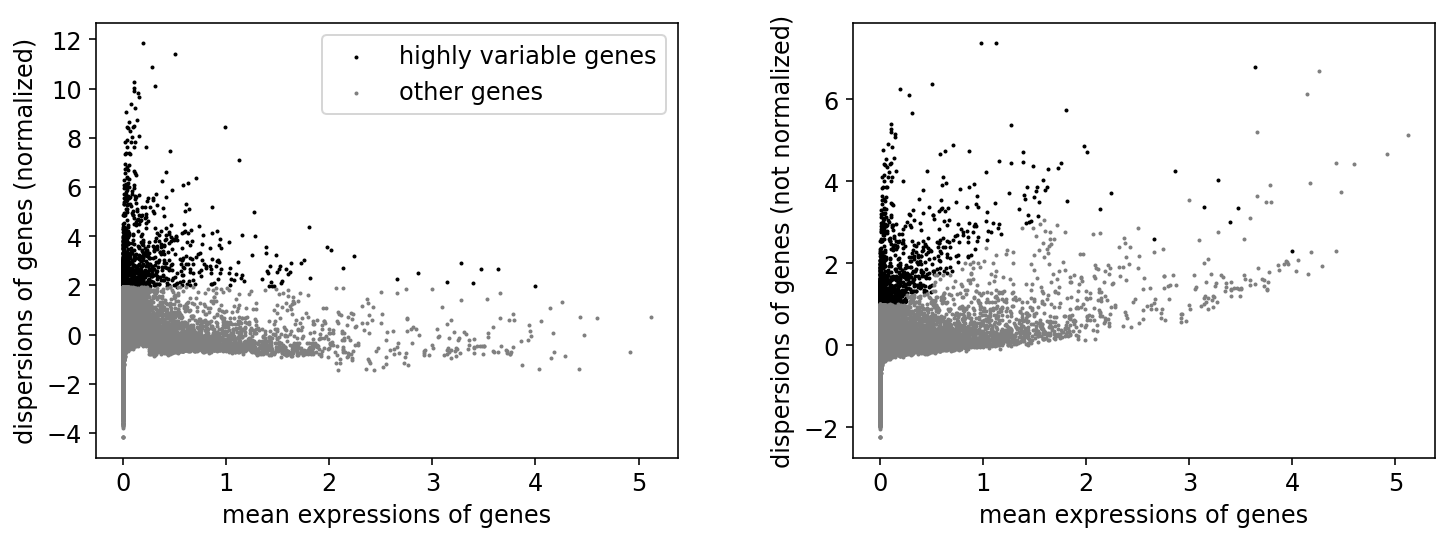

In [29]:
filter_result = sc.pp.highly_variable_genes(adata, min_disp=0.3,inplace=False, n_top_genes=1209)

sc.pl.highly_variable_genes(filter_result)

In [30]:
print("{:,} highly variable genes".format(sum(x[0] for x in filter_result)))

1,209 highly variable genes


### Cluster with Louvain and Plot PCA, UMAP, TSNE

In [31]:
%%time
sc.tl.pca(adata)
sc.pp.neighbors(adata)
sc.tl.louvain(adata)

CPU times: user 35.6 s, sys: 6.37 s, total: 42 s
Wall time: 26.7 s


In [32]:
%%time
sc.tl.tsne(adata, n_pcs=10)

CPU times: user 26.6 s, sys: 0 ns, total: 26.6 s
Wall time: 26.6 s


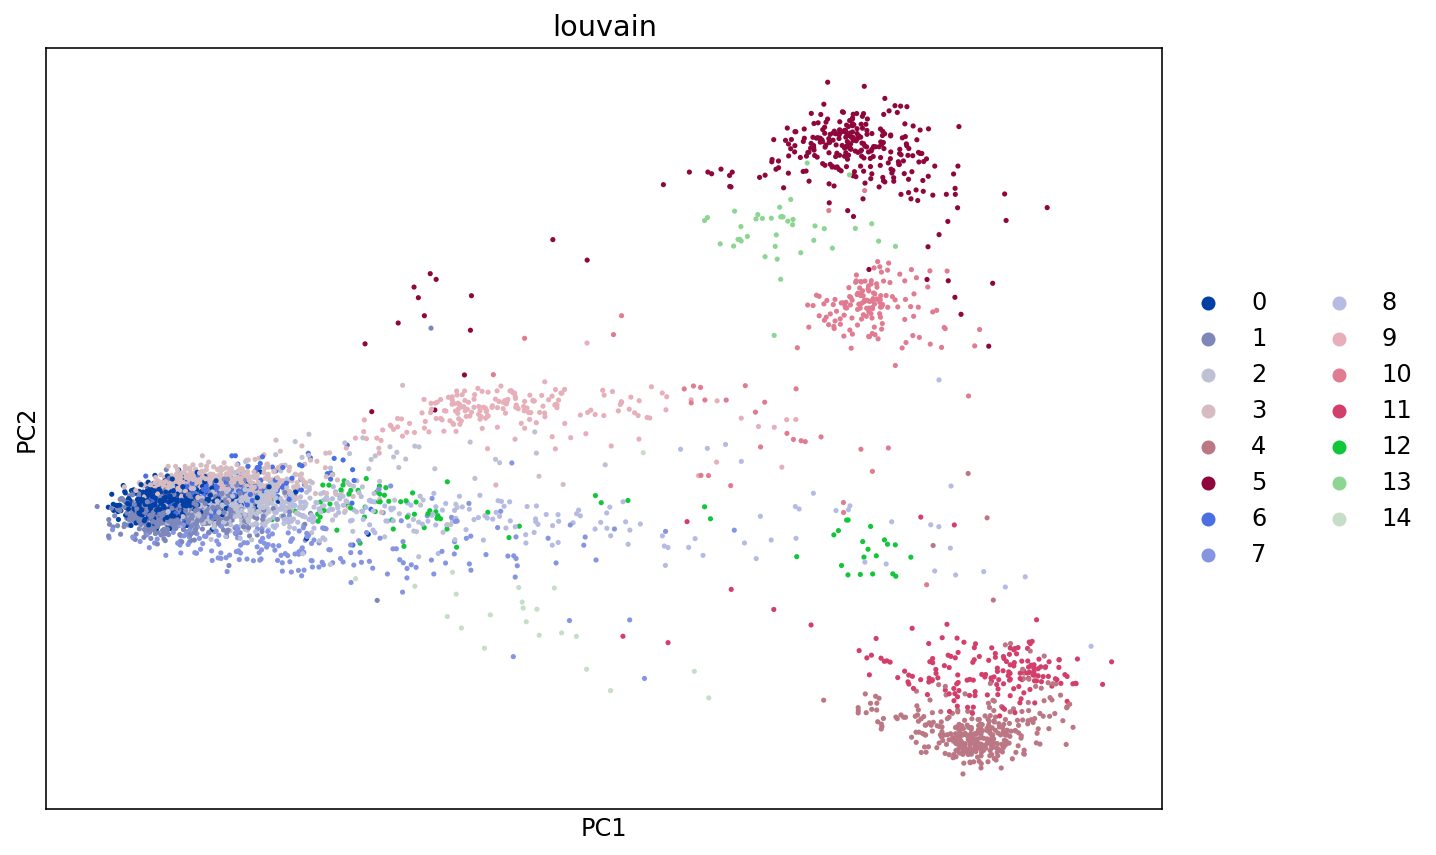

In [33]:
fig, ax = plt.subplots(figsize=(10, 7))
sc.pl.pca(adata, color="louvain", ax=ax)

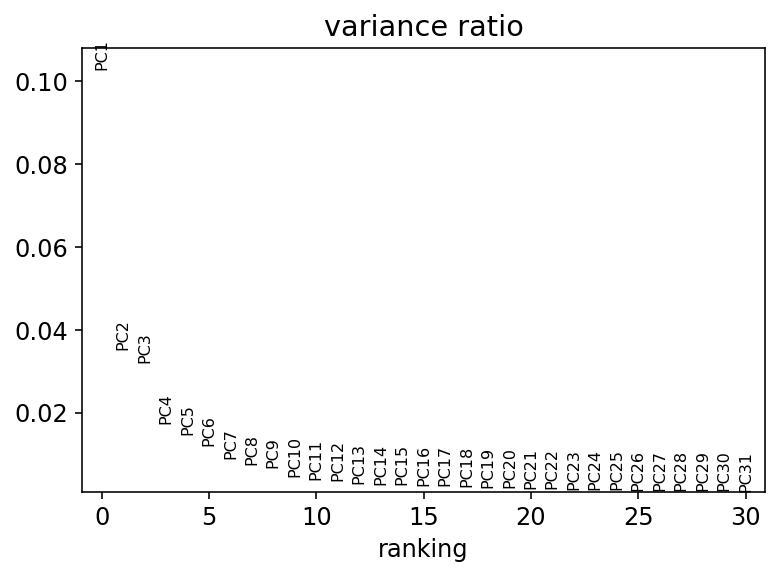

In [34]:
sc.pl.pca_variance_ratio(adata)

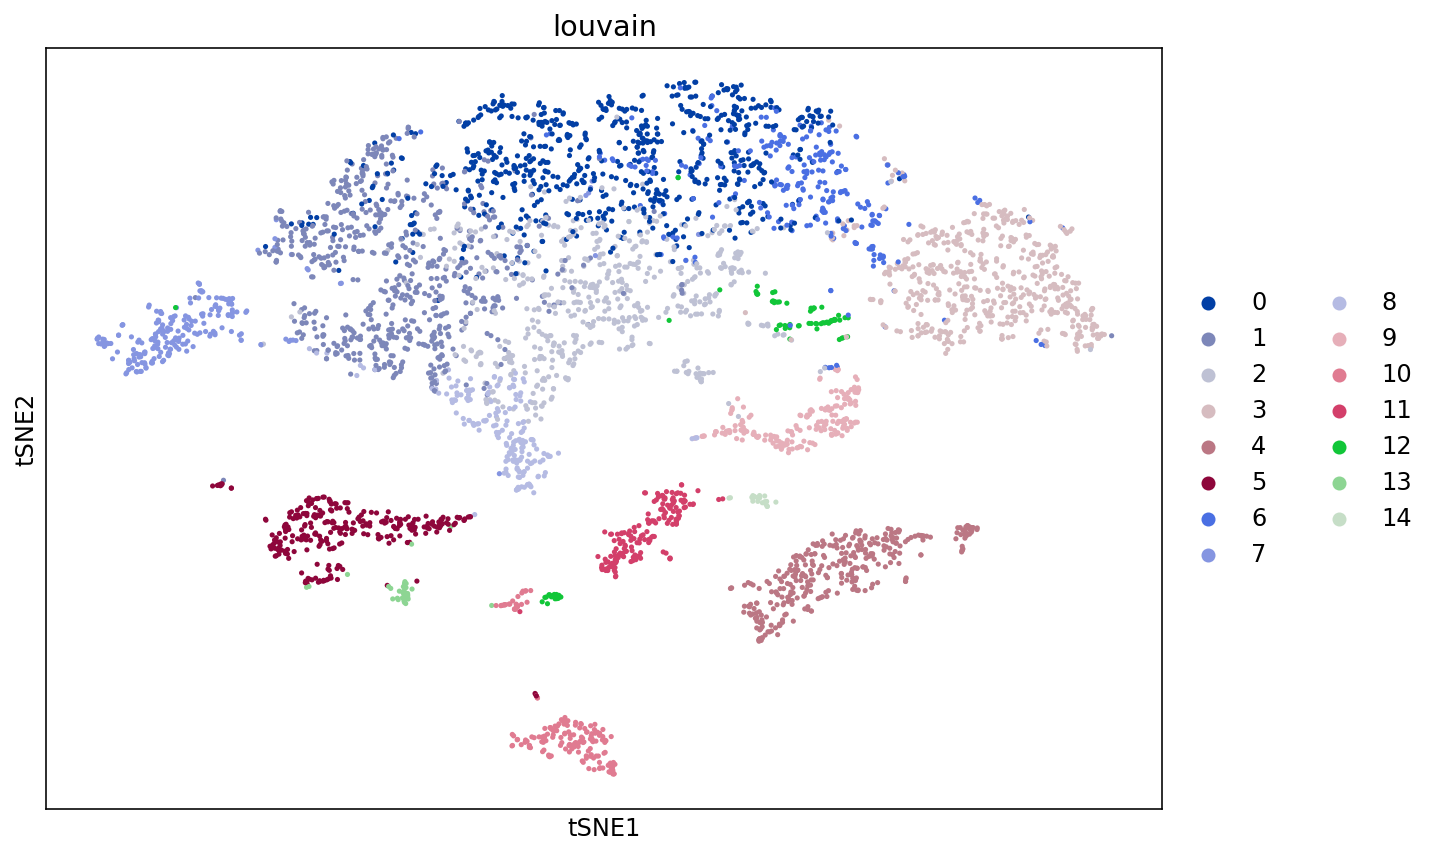

In [35]:
fig, ax = plt.subplots(figsize=(10, 7))
sc.pl.tsne(adata, color="louvain", ax=ax, save="getting_started_tsne.png")

In [36]:
!date

Thu Dec  5 03:09:49 UTC 2019
